In [1]:
# ================================
# Decision Tree Classification Example
# ================================

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load Dataset
dataset = pd.read_csv(r"/content/logit classification.csv")

# Features & Target
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0
)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model - Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

# Evaluation Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

ac = accuracy_score(y_test, y_pred)
print("Accuracy:", ac)

cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

# Bias & Variance
train_score = classifier.score(X_train, y_train)  # Variance check
test_score = classifier.score(X_test, y_test)    # Bias check

print("Training Score (Variance):", train_score)
print("Test Score (Bias):", test_score)

Confusion Matrix:
 [[53  5]
 [ 3 19]]
Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        58
           1       0.79      0.86      0.83        22

    accuracy                           0.90        80
   macro avg       0.87      0.89      0.88        80
weighted avg       0.90      0.90      0.90        80

Training Score (Variance): 0.996875
Test Score (Bias): 0.9


In [2]:

"""
Decision Tree Classification
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# 1. Load Data (UPDATE PATH!)
try:
    dataset = pd.read_csv(r"/content/logit classification.csv")
    X = dataset.iloc[:, [2, 3]].values  # Features
    y = dataset.iloc[:, -1].values      # Target
except Exception as e:
    print("Error loading data:", e)
    raise

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 3. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Train Base Model
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# 5. Evaluate
print("Base Model Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 6. Hyperparameter Tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# 7. Final Model
best_dt = grid_search.best_estimator_
print("Test Accuracy (Tuned):", best_dt.score(X_test, y_test))

Base Model Accuracy: 0.9
Confusion Matrix:
 [[53  5]
 [ 3 19]]

Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}
Best CV Accuracy: 0.9
Test Accuracy (Tuned): 0.95



Base Model Performance:
Confusion Matrix:
 [[53  5]
 [ 3 19]]

Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        58
           1       0.79      0.86      0.83        22

    accuracy                           0.90        80
   macro avg       0.87      0.89      0.88        80
weighted avg       0.90      0.90      0.90        80


Training Score: 0.996875
Test Score: 0.9


Starting Grid Search...

Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy (CV): 0.9

Tuned Model Performance:
Tuned Model Test Accuracy: 0.95


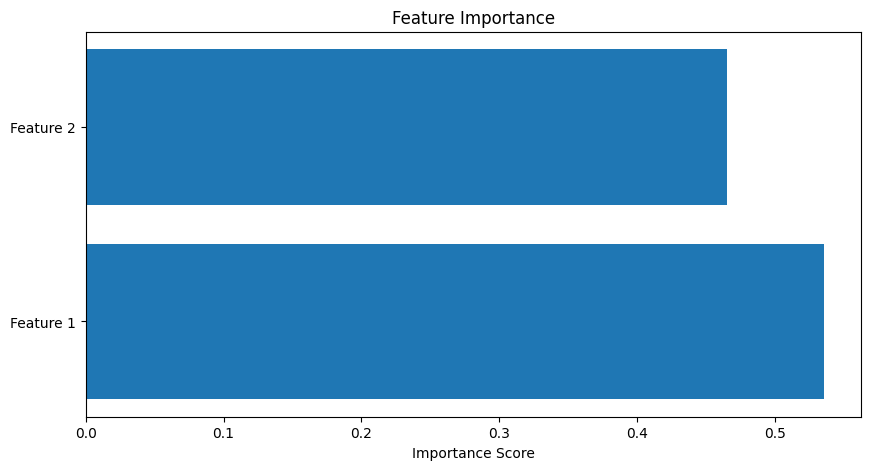


Execution completed successfully!


In [3]:
# -*- coding: utf-8 -*-
"""
Decision Tree Classification with Hyperparameter Tuning
"""

# ===============================================
# Import Libraries
# ===============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix,
                           accuracy_score,
                           classification_report)
from sklearn.model_selection import GridSearchCV

# ===============================================
# 1. Load Dataset
# ===============================================
try:
    # Update this path to your dataset location
    dataset = pd.read_csv(r"/content/logit classification.csv")

    # Features & Target
    X = dataset.iloc[:, [2, 3]].values   # Selecting 2 features
    y = dataset.iloc[:, -1].values       # Target variable

except Exception as e:
    print("Error loading dataset:", str(e))
    raise

# ===============================================
# 2. Train-Test Split
# ===============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# ===============================================
# 3. Feature Scaling (important for visualization)
# ===============================================
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ===============================================
# 4. Decision Tree Model
# ===============================================
# Base Model
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# ===============================================
# 5. Predictions
# ===============================================
y_pred = dt.predict(X_test)

# ===============================================
# 6. Evaluation Metrics
# ===============================================
print("\nBase Model Performance:")
print("="*50)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Bias-Variance Check
print("\nTraining Score:", dt.score(X_train, y_train))   # High → overfitting
print("Test Score:", dt.score(X_test, y_test))         # Low → underfitting

# ===============================================
# 7. Hyperparameter Tuning (Grid Search)
# ===============================================
print("\n\nStarting Grid Search...")
print("="*50)

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6, 10],
    'min_samples_split': [2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best Parameters
print("\nBest Parameters:", grid_search.best_params_)
print("Best Accuracy (CV):", grid_search.best_score_)

# Final Model using best params
best_dt = grid_search.best_estimator_

# Test Accuracy of tuned model
print("\nTuned Model Performance:")
print("="*50)
print("Tuned Model Test Accuracy:", best_dt.score(X_test, y_test))

# ===============================================
# 8. Visualization (Optional - Works in Spyder)
# ===============================================
try:
    # Feature importance
    plt.figure(figsize=(10,5))
    plt.barh(range(len(best_dt.feature_importances_)), best_dt.feature_importances_)
    plt.yticks(range(len(best_dt.feature_importances_)), ['Feature 1', 'Feature 2'])
    plt.title('Feature Importance')
    plt.xlabel('Importance Score')
    plt.show()

except Exception as e:
    print("\nVisualization error (may need backend configuration):", str(e))
    print("Try going to: Tools > Preferences > IPython console > Graphics")
    print("Set 'Graphics backend' to 'Automatic' or 'Qt5'")

print("\nExecution completed successfully!")